<a href="https://colab.research.google.com/github/Rmkh77/Global-Power-generation-/blob/main/power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
 # used for mathematical calculations
import pandas as pd
# used to read data set
import matplotlib.pyplot as plt
 # used in plotting graphs
import seaborn as sns
# used to draw a  heat map
import plotly.express as px
 # used in choropleth
from sklearn.preprocessing import StandardScaler
# Standard Scaler used to standardize
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# metrics used for performance evaluation


In [2]:
power=pd.read_csv("/content/drive/MyDrive/project_hbic/global power plant/powerplants (global) - global_power_plants.csv")
# reading data set

In [ ]:
power.info()
# complete information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country code                   34936 non-null  object 
 1   country_long                   34936 non-null  object 
 2   name of powerplant             34936 non-null  object 
 3   capacity in MW                 34936 non-null  float64
 4   latitude                       34936 non-null  float64
 5   longitude                      34936 non-null  float64
 6   primary_fuel                   34936 non-null  object 
 7   secondary fuel                 1944 non-null   object 
 8   other_fuel2                    276 non-null    object 
 9   other_fuel3                    92 non-null     object 
 10  start date                     17447 non-null  float64
 11  owner of plant                 20868 non-null  object 
 12  generation_gwh_2021            9659 non-null  

In [ ]:
power.head(2)
# printing the head of the dataset

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.119,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,123.77
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.795,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.43


In [ ]:
power.nunique()
# number of unique value that exist in each column

country code                       167
country_long                       167
name of powerplant               34528
capacity in MW                    5456
latitude                         31779
longitude                        33036
primary_fuel                        15
secondary fuel                      12
other_fuel2                         11
other_fuel3                          8
start date                        1953
owner of plant                   10144
generation_gwh_2021               8312
geolocation_source                  28
estimated_generation_gwh_2021     8845
dtype: int64

In [ ]:
power.isnull().sum()
# finding the number of null values present in each column

country code                         0
country_long                         0
name of powerplant                   0
capacity in MW                       0
latitude                             0
longitude                            0
primary_fuel                         0
secondary fuel                   32992
other_fuel2                      34660
other_fuel3                      34844
start date                       17489
owner of plant                   14068
generation_gwh_2021              25277
geolocation_source                 419
estimated_generation_gwh_2021    18816
dtype: int64

In [ ]:
df1=pd.DataFrame(power.groupby('country code')['capacity in MW'].sum())
# creating dataframe country code and capacity

fig = px.choropleth(df1,locations=df1.index,color='capacity in MW',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,1500000),height=500
    )
fig.show()
# display

this map is used tho show the production of electricity in each country

In [ ]:
power['primary_fuel'].nunique() # getting number of unique value present in primary fuel column

15

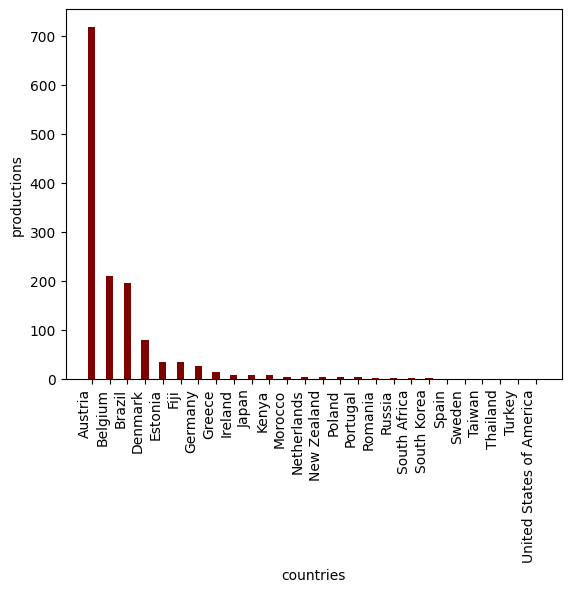

In [ ]:
lst1=lst['country_long'].value_counts() # getting count of all values present in country long
tisland=lst['country_long'].unique() # getting unique values present in country long

plt.bar(tisland, lst1,color ='maroon',
        width = 0.4)
#plotting bar graph

plt.xlabel("countries") # x-axis label
plt.ylabel("productions") # y-axis label
plt.xticks(rotation=90, ha='right') # rotating x-axis names by 90 degrees anti clock wise
plt.show() # plotting

this is used to show the  production of countries around the world

<ipython-input-76-681e309c8352>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

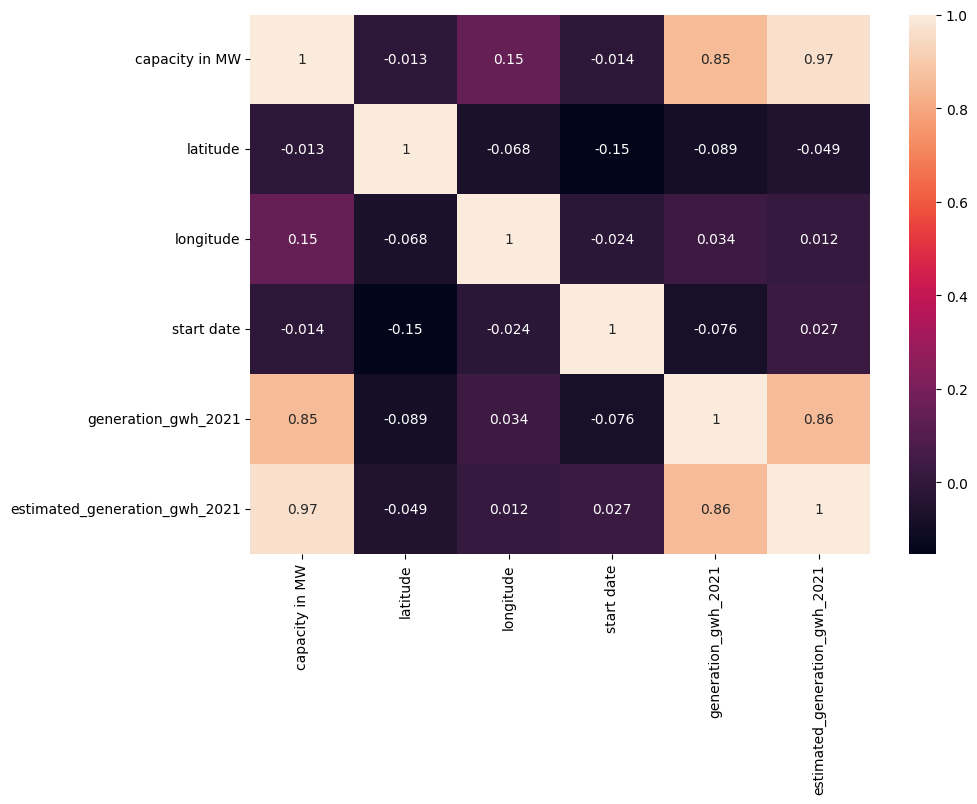

In [ ]:
# plotting Heat Map

plt.figure(figsize=(10,7))
sns.heatmap(power.corr(),annot=True)

this heatmap shows the co-relation between any two columns

In [ ]:
power.dropna(subset=['estimated_generation_gwh_2021'],inplace=True)
 # dropping estimated_generation_gwh_2021 from data set
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16120 entries, 0 to 34935
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country code                   16120 non-null  object 
 1   country_long                   16120 non-null  object 
 2   name of powerplant             16120 non-null  object 
 3   capacity in MW                 16120 non-null  float64
 4   latitude                       16120 non-null  float64
 5   longitude                      16120 non-null  float64
 6   primary_fuel                   16120 non-null  object 
 7   secondary fuel                 23 non-null     object 
 8   other_fuel2                    1 non-null      object 
 9   other_fuel3                    0 non-null      object 
 10  start date                     5644 non-null   float64
 11  owner of plant                 7243 non-null   object 
 12  generation_gwh_2021            2559 non-null  

In [ ]:
# grouping all int and float type columns
num_types = power.select_dtypes(include=['int64', 'float64'])

temp=num_types['latitude']
temp1=num_types['longitude']
temp2=num_types['start date']

num_types.drop(columns=['latitude','longitude','start date'],inplace=True)
# dropping 'latitude','longitude','start date' columns and having a backup in temp,temp1,temp2

In [ ]:
num_types.drop(columns=['generation_gwh_2021'],inplace=True)
#drop generaton_gwh_2021 column

In [ ]:
scaler = StandardScaler()
# standardizing numerical columns
num_type= pd.DataFrame(scaler.fit_transform(num_types),
                                    columns = num_types.columns,
                                    index = num_types.index)
transformed=pd.concat([num_type,temp1,temp],axis=1)
# concating numerical and 'latitude','longitude' columns
transformed

,capacity in MW,estimated_generation_gwh_2021,longitude,latitude
0,-0.133548,-0.096827,65.1190,32.3220
1,-0.205780,-0.185257,65.7950,31.6700
2,-0.205780,-0.185081,65.7920,31.6230
3,-0.029911,-0.011796,69.4787,34.5560
4,0.076866,0.140232,69.7170,34.6410
...,...,...,...,...
34922,2.871913,3.192831,28.4199,-15.8089
34923,2.683483,3.962814,28.7619,-16.5222
34927,-0.199499,-0.178499,30.8649,-12.9884
34933,0.101990,0.282624,25.8500,-17.9167


In [ ]:
# separating target column and data set
X=transformed.drop('estimated_generation_gwh_2021',axis=1)
y=transformed['estimated_generation_gwh_2021']

In [ ]:
# Train_test_split is used to split data set into 4 parts
# X_train : traning dataset used to train model
# y_train : output for traning dataset used to verify

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# X_test : testing data set to test the model
# y_test : used to test model after prediction

X_train.isnull().sum()

capacity in MW    0
longitude         0
latitude          0
dtype: int64

In [ ]:
# lists to store algorithm names and accuracy of those algorithms
alg_name=[]
alg_values=[]
alg_error=[]

In [ ]:
# evaluation measures

def printing(name,y_test,y_test_pred):
  alg_name.append(name)
  print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
  print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
  print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
  print('Mean Absolute percentage Error: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred))
  alg_values.append(r2_score(y_test,y_test_pred))
  alg_error.append( metrics.mean_absolute_percentage_error(y_test, y_test_pred))
  print("R-Square is",r2_score(y_test,y_test_pred))

In [ ]:
# K-Neighbors Regression

from sklearn.neighbors import KNeighborsRegressor

regressor_knn = KNeighborsRegressor()
regressor_knn.fit(X_train, y_train) # learning
y_test_pred = regressor_knn.predict(X_test)# predicting
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()
# comparion between actual values and predicted values

,Actual,Predicted
18228,-0.044872,-0.127844
2436,-0.197933,-0.150483
1911,-0.160996,0.069696
13714,-0.198630,-0.192379
27464,-0.195465,-0.175068


In [ ]:
printing("KNN",y_test,y_test_pred)
# printing perfomance measures

Mean Absolute Error:  0.11523037015755523
Mean Squared Error:  0.4700507116212917
Root Mean Squared Error:  0.685602444293551
Mean Absolute percentage Error:  1.213907615635583
R-Square is 0.5678440757000827


In [ ]:
# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)# learning
y_test_pred = regressor_dt.predict(X_test) # predicting
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df
# comparion between actual values and predicted values

,Actual,Predicted
18228,-0.044872,0.174861
2436,-0.197933,-0.199268
1911,-0.160996,-0.157454
13714,-0.198630,-0.198848
27464,-0.195465,-0.191864
...,...,...
18648,-0.122741,-0.133042
18995,-0.117176,-0.119652
8567,-0.139363,-0.139237
20089,-0.197614,-0.197883


In [ ]:
printing("Decision Tree",y_test,y_test_pred)
# printing perfomance measures

Mean Absolute Error:  0.04493010588978207
Mean Squared Error:  0.05833889663975205
Root Mean Squared Error:  0.2415344626337038
Mean Absolute percentage Error:  0.7043280607557174
R-Square is 0.9463642981987406


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train) # learning
y_test_pred = regressor_rf.predict(X_test)# predicting
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df
# comparion between actual values and predicted values

,Actual,Predicted
18228,-0.044872,0.052146
2436,-0.197933,-0.198699
1911,-0.160996,-0.165077
13714,-0.198630,-0.198835
27464,-0.195465,-0.193540
...,...,...
18648,-0.122741,-0.128966
18995,-0.117176,-0.117831
8567,-0.139363,-0.138631
20089,-0.197614,-0.197666


In [ ]:
printing("Random Forest",y_test,y_test_pred)
#performance measures

Mean Absolute Error:  0.039657566487454575
Mean Squared Error:  0.10716627758269526
Root Mean Squared Error:  0.327362608711953
Mean Absolute percentage Error:  0.3995329453082352
R-Square is 0.9014733078846096


In [ ]:
# Importing models
from sklearn.linear_model import LinearRegression,Ridge

# Linear Regression
regressor = LinearRegression()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data
regressor.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = regressor.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
printing("Linear Regression",y_test,y_pred_lr)
#performance measures

Mean Absolute Error:  0.06585407630496587
Mean Squared Error:  0.05891453860066014
Root Mean Squared Error:  0.2427231727723172
Mean Absolute percentage Error:  1.0817481900306076
R-Square is 0.945835063634189


In [ ]:
printing("Ridge Regression",y_test,y_pred_ridge)
#performance measures

Mean Absolute Error:  0.0658362091268268
Mean Squared Error:  0.05888969369499166
Root Mean Squared Error:  0.24267198786632063
Mean Absolute percentage Error:  1.0816305005255469
R-Square is 0.945857905580617


In [ ]:
alg_name
# displaying all algorithms names that had been used

['KNN',
 'Decision Tree',
 'Random Forest',
 'Linear Regression',
 'Ridge Regression']

In [ ]:
alg_values
# all algorithms accuracies

[0.5678440757000827,
 0.9463642981987406,
 0.9014733078846096,
 0.945835063634189,
 0.945857905580617]

In [ ]:
alg_error
# mean percentage error of the algorithms

[1.213907615635583,
 0.7043280607557174,
 0.3995329453082352,
 1.0817481900306076,
 1.0816305005255469]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Linear Regression'),
  Text(4, 0, 'Ridge Regression')])

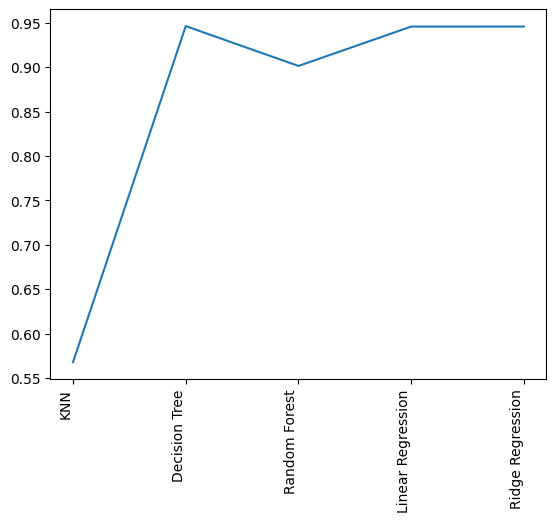

In [ ]:
# plotting a line graph
plt.plot(alg_name,alg_values)
plt.xticks(rotation=90,ha='right')
# it shows relation between algorithm and its accuracy

line graph to show the accuracies

([0, 1, 2, 3, 4],
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Linear Regression'),
  Text(4, 0, 'Ridge Regression')])

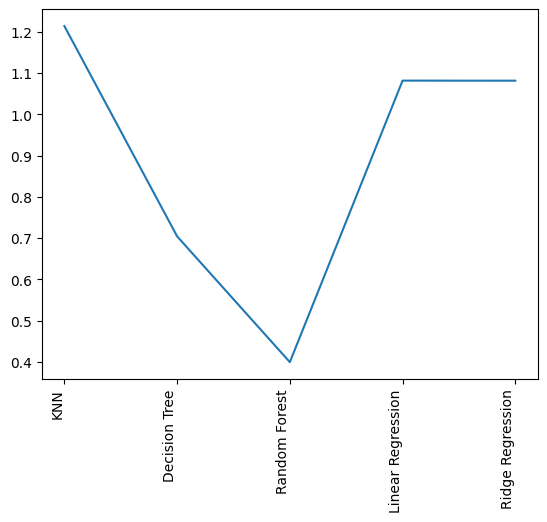

In [ ]:
# plotting a line graph
plt.plot(alg_name,alg_error)
plt.xticks(rotation=90,ha='right')
# it shows relation between algorithm and its mean absolute percentage error

line graph to show the mean percentage error of all algorithms